In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

rcParams['figure.figsize'] = (12, 10)
rcParams['axes.grid'] = False

In [2]:
dataset_path = '/content/drive/MyDrive/Projects/Cryptofuture/Finding Correlation/final_complete_dataset.csv'

df = pd.read_csv(dataset_path)
df

,date,pos_likes_count,neg_likes_count,pos_retweets_count,neg_retweets_count,sum_pos_sen,sum_neg_sen,mean_pos_sen,mean_neg_sen,median_pos_sen,median_neg_sen,std_pos_sen,std_neg_sen,skew_pos_sen,skew_neg_sen,kurtosis_pos_sen,kurtosis_neg_sen,tweet_vol,Price Lag 0,Price Lag 1,Price Lag 2,Price Lag 3,Price Lag 4,Price Lag 5,Price Lag 6,zscore_sum_pos_sen,zscore_sum_neg_sen,zscore_mean_pos_sen,zscore_mean_neg_sen,zscore_median_pos_sen,zscore_median_neg_sen,zscore_std_pos_sen,zscore_std_neg_sen,zscore_skew_pos_sen,zscore_skew_neg_sen,zscore_kurtosis_pos_sen,zscore_kurtosis_neg_sen
0,2017-01-01,884,333,580,162,11.441429,6.160855,0.817245,0.770107,0.864431,0.747215,0.122269,0.107939,-1.071271,0.806148,-0.094580,0.148902,22,995.44,963.38,959.04,971.08,972.17,925.78,898.38,-1.089510,-0.921094,2.461681,1.735248,3.332171,0.942551,0.528975,-0.549228,-4.531087,1.384814,2.910988,1.575560
1,2017-01-02,5335,1444,3631,620,41.188336,9.886617,0.762747,0.706187,0.790568,0.698603,0.129751,0.114417,-0.118365,1.120719,-1.211109,0.985415,68,1017.05,995.44,963.38,959.04,971.08,972.17,925.78,-0.741059,-0.816667,-0.320371,-0.765161,0.664541,-0.413446,1.393373,-0.054944,-0.277476,2.314870,-0.615090,2.920141
2,2017-01-03,2104,436,1405,258,23.866358,6.229506,0.723223,0.692167,0.710602,0.635604,0.112787,0.126986,0.425864,1.087090,-0.585921,0.354295,42,1033.30,1017.05,995.44,963.38,959.04,971.08,972.17,-0.943966,-0.919170,-2.338022,-1.313578,-2.223544,-2.170769,-0.566369,0.904036,2.151871,2.215442,1.359297,1.905700
3,2017-01-04,3702,1152,2586,812,36.724756,14.832695,0.749485,0.706319,0.758723,0.708842,0.107360,0.090134,0.080198,0.001365,-0.947776,-1.399742,70,1135.41,1033.30,1017.05,995.44,963.38,959.04,971.08,-0.793345,-0.678036,-0.997387,-0.760003,-0.485569,-0.127817,-1.193307,-1.907694,0.608876,-0.994592,0.216535,-0.913677
4,2017-01-05,3372,2654,2737,1810,46.652301,24.570946,0.740513,0.722675,0.758723,0.716897,0.106673,0.122467,0.030672,0.495685,-0.919614,-0.519497,97,989.35,1135.41,1033.30,1017.05,995.44,963.38,959.04,-0.677055,-0.405088,-1.455402,-0.120188,-0.485569,0.096849,-1.272663,0.559261,0.387804,0.466904,0.305473,0.501198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2021-03-11,196687,76370,57526,9545,282.645730,96.802645,0.772256,0.706589,0.775007,0.689717,0.117061,0.109205,-0.060172,0.436546,-1.011064,-0.895869,503,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,2.087337,1.619450,0.165058,-0.749447,0.102521,-0.661319,-0.072679,-0.452601,-0.017709,0.292056,0.016665,-0.103768
1531,2021-03-12,260181,112824,57834,15359,424.305062,150.844422,0.760403,0.721744,0.758369,0.698241,0.119769,0.112768,0.052600,0.408921,-1.072969,-0.879554,767,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,3.746714,3.134154,-0.440011,-0.156616,-0.498358,-0.423532,0.240167,-0.180739,0.485683,0.210379,-0.178833,-0.077544
1532,2021-03-13,565079,407073,88071,43004,820.384319,280.555954,0.771038,0.732522,0.774298,0.718339,0.119186,0.119242,-0.093955,0.274106,-1.127463,-1.064358,1447,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,8.386329,6.769759,0.102870,0.265013,0.076936,0.137096,0.172872,0.313227,-0.168514,-0.188213,-0.350930,-0.374592
1533,2021-03-14,322121,137290,68436,18280,606.468292,215.716889,0.767681,0.726319,0.758776,0.707837,0.120114,0.120018,0.012624,0.343325,-1.160040,-1.047035,1087,58998.89,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,5.880548,4.952424,-0.068476,0.022381,-0.483680,-0.155859,0.280062,0.372415,0.307236,0.016440,-0.453811,-0.346748


In [3]:
input_df = df[['Price Lag 0', 'Price Lag 1', 'Price Lag 2', 'Price Lag 3', 
                   'Price Lag 4', 'Price Lag 5', 'Price Lag 6', 'zscore_sum_pos_sen',
                   'zscore_sum_neg_sen', 'tweet_vol', 'pos_likes_count',
               'pos_retweets_count', 'neg_likes_count', 'neg_retweets_count']]

# input_df['zpos_sen_1'] = input_df['zscore_sum_pos_sen'].shift(1)
# input_df['zneg_sen_1'] = input_df['zscore_sum_neg_sen'].shift(1)

# input_df['zpos_sen_2'] = input_df['zscore_sum_pos_sen'].shift(2)
# input_df['zneg_sen_2'] = input_df['zscore_sum_neg_sen'].shift(2)


# input_df['zpos_sen_3'] = input_df['zscore_sum_pos_sen'].shift(3)
# input_df['zneg_sen_3'] = input_df['zscore_sum_neg_sen'].shift(3)


# input_df = input_df[3:]
input_df

,Price Lag 0,Price Lag 1,Price Lag 2,Price Lag 3,Price Lag 4,Price Lag 5,Price Lag 6,zscore_sum_pos_sen,zscore_sum_neg_sen,tweet_vol,pos_likes_count,pos_retweets_count,neg_likes_count,neg_retweets_count
0,995.44,963.38,959.04,971.08,972.17,925.78,898.38,-1.089510,-0.921094,22,884,580,333,162
1,1017.05,995.44,963.38,959.04,971.08,972.17,925.78,-0.741059,-0.816667,68,5335,3631,1444,620
2,1033.30,1017.05,995.44,963.38,959.04,971.08,972.17,-0.943966,-0.919170,42,2104,1405,436,258
3,1135.41,1033.30,1017.05,995.44,963.38,959.04,971.08,-0.793345,-0.678036,70,3702,2586,1152,812
4,989.35,1135.41,1033.30,1017.05,995.44,963.38,959.04,-0.677055,-0.405088,97,3372,2737,2654,1810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,2.087337,1.619450,503,196687,57526,76370,9545
1531,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,3.746714,3.134154,767,260181,57834,112824,15359
1532,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,8.386329,6.769759,1447,565079,88071,407073,43004
1533,58998.89,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,5.880548,4.952424,1087,322121,68436,137290,18280


In [4]:
input_df.describe()

,Price Lag 0,Price Lag 1,Price Lag 2,Price Lag 3,Price Lag 4,Price Lag 5,Price Lag 6,zscore_sum_pos_sen,zscore_sum_neg_sen,tweet_vol,pos_likes_count,pos_retweets_count,neg_likes_count,neg_retweets_count
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03,1.535000e+03,1535.000000,1.535000e+03,1535.000000,1535.000000,1535.000000
mean,9217.005928,9179.079479,9141.268502,9102.044586,9065.377453,9028.319713,8992.492397,3.049316e-16,2.036735e-16,189.516612,3.820996e+04,10018.467101,16927.438436,3212.570684
std,8870.203768,8780.440641,8690.267768,8590.541595,8504.559157,8415.489457,8332.496672,1.000326e+00,1.000326e+00,158.841092,7.261586e+04,27910.674510,31061.591425,4709.313774
min,785.430000,785.430000,785.430000,785.430000,785.430000,785.430000,785.430000,-1.223533e+00,-1.093773e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4300.435000,4282.805000,4273.185000,4265.500000,4254.720000,4232.275000,4218.280000,-4.922263e-01,-4.784922e-01,112.000000,1.197650e+04,3669.500000,4741.000000,1178.000000
50%,7610.900000,7592.720000,7584.740000,7571.770000,7558.580000,7546.920000,7542.340000,-1.932658e-01,-2.253489e-01,157.000000,2.003900e+04,5920.000000,8518.000000,1924.000000
75%,10160.580000,10153.925000,10145.910000,10136.710000,10130.105000,10119.000000,10108.360000,1.721375e-01,1.136908e-01,209.000000,3.239150e+04,9879.500000,14869.000000,3194.500000
max,61179.790000,61179.790000,61179.790000,57809.410000,57809.410000,57469.950000,57469.950000,8.776375e+00,1.222063e+01,1474.000000,1.029934e+06,982210.000000,407073.000000,79056.000000


In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_df)

scaled_data

array([[3.47731146e-03, 2.94646719e-03, 2.87460617e-03, ...,
        5.90505085e-04, 8.18035094e-04, 2.04918033e-03],
       [3.83512633e-03, 3.47731146e-03, 2.94646719e-03, ...,
        3.69676546e-03, 3.54727530e-03, 7.84254200e-03],
       [4.10419119e-03, 3.83512633e-03, 3.47731146e-03, ...,
        1.43044766e-03, 1.07106096e-03, 3.26350941e-03],
       ...,
       [1.00000000e+00, 9.35034165e-01, 9.44193796e-01, ...,
        8.96661610e-02, 1.00000000e+00, 5.43968832e-01],
       [9.63889012e-01, 1.00000000e+00, 9.35034165e-01, ...,
        6.96755276e-02, 3.37261376e-01, 2.31228496e-01],
       [9.66895750e-01, 9.63889012e-01, 1.00000000e+00, ...,
        7.35962778e-02, 2.62309217e-01, 1.62340619e-01]])

In [6]:
features = scaled_data
target = scaled_data[:, 0]

target

array([0.00347731, 0.00383513, 0.00410419, ..., 1.        , 0.96388901,
       0.96689575])

In [7]:
len(features[0, :])

14

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=42, shuffle=False)

In [9]:
win_length = 3
batch_size = 64
num_features = len(features[0, :])

train_generator = TimeseriesGenerator(
    x_train, y_train, length=win_length, sampling_rate=1, 
    batch_size=batch_size)

test_generator = TimeseriesGenerator(
    x_test, y_test, length=win_length, sampling_rate=1, 
    batch_size=batch_size)

In [10]:
train_generator[0][0]

array([[[0.00347731, 0.00294647, 0.00287461, ..., 0.00059051,
         0.00081804, 0.00204918],
        [0.00383513, 0.00347731, 0.00294647, ..., 0.00369677,
         0.00354728, 0.00784254],
        [0.00410419, 0.00383513, 0.00347731, ..., 0.00143045,
         0.00107106, 0.00326351]],

       [[0.00383513, 0.00347731, 0.00294647, ..., 0.00369677,
         0.00354728, 0.00784254],
        [0.00410419, 0.00383513, 0.00347731, ..., 0.00143045,
         0.00107106, 0.00326351],
        [0.00579491, 0.00410419, 0.00383513, ..., 0.00263284,
         0.00282996, 0.0102712 ]],

       [[0.00410419, 0.00383513, 0.00347731, ..., 0.00143045,
         0.00107106, 0.00326351],
        [0.00579491, 0.00410419, 0.00383513, ..., 0.00263284,
         0.00282996, 0.0102712 ],
        [0.00337647, 0.00579491, 0.00410419, ..., 0.00278657,
         0.00651972, 0.02289516]],

       ...,

       [[0.00824365, 0.00778285, 0.00723958, ..., 0.00289857,
         0.00219371, 0.00698239],
        [0.00792938, 

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 256)            277504    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            197120    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 3, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


22/22 [==============================] - 7s 104ms/step - loss: 0.0034 - mean_absolute_error: 0.0359 - val_loss: 0.0981 - val_mean_absolute_error: 0.2591
Epoch 2/50
22/22 [==============================] - 1s 36ms/step - loss: 0.0041 - mean_absolute_error: 0.0531 - val_loss: 0.0190 - val_mean_absolute_error: 0.1063
Epoch 3/50
22/22 [==============================] - 1s 36ms/step - loss: 0.0012 - mean_absolute_error: 0.0284 - val_loss: 0.0027 - val_mean_absolute_error: 0.0363
Epoch 4/50
22/22 [==============================] - 1s 36ms/step - loss: 4.3869e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0042 - val_mean_absolute_error: 0.0493
Epoch 5/50
22/22 [==============================] - 1s 37ms/step - loss: 3.4965e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0054 - val_mean_absolute_error: 0.0558
Epoch 6/50
22/22 [==============================] - 1s 36ms/step - loss: 2.6098e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0024 - val_mean_absolute_error: 0.0346
Epoch 7/50
22/22 [==

In [14]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.02244659699499607, 0.1108357161283493]

In [15]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [16]:
df_pred = pd.concat(
    [pd.DataFrame(predictions), 
    pd.DataFrame(x_test[:, 1:][win_length:])], axis=1)

In [17]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.183917,0.177548,0.176239,0.186621,0.188593,0.186825,0.185520,0.134720,0.105881,0.146060,0.036127,0.015110,0.075500,0.300116
1,0.182922,0.174533,0.177548,0.186656,0.186621,0.189723,0.186825,0.115991,0.060118,0.114130,0.029281,0.011210,0.025561,0.024830
2,0.182242,0.175219,0.174533,0.188042,0.186656,0.187738,0.189723,0.103560,0.070857,0.104620,0.030655,0.009780,0.039578,0.038049
3,0.179226,0.177631,0.175219,0.184849,0.188042,0.187774,0.187738,0.123798,0.079666,0.127717,0.039095,0.015129,0.041319,0.037353
4,0.181806,0.181663,0.177631,0.185575,0.184849,0.189168,0.187774,0.175456,0.101445,0.177310,0.061830,0.014070,0.059265,0.041350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.592059,0.912467,0.896495,0.905226,0.879959,0.848686,0.846615,0.331090,0.203781,0.340353,0.190970,0.058568,0.187608,0.120737
147,0.600643,0.944194,0.912467,0.949482,0.905226,0.885228,0.848686,0.497029,0.317545,0.519701,0.252619,0.058882,0.277159,0.194280
148,0.607499,0.935034,0.944194,0.966398,0.949482,0.910647,0.885228,0.960995,0.590603,0.981658,0.548656,0.089666,1.000000,0.543969
149,0.621806,1.000000,0.935034,1.000000,0.966398,0.955169,0.910647,0.710415,0.454110,0.737092,0.312759,0.069676,0.337261,0.231228


In [18]:
rev_trans = scaler.inverse_transform(df_pred)

rev_trans

array([[ 11892.95616326,  11508.31      ,  11429.3       , ...,
         14841.        ,  30734.        ,  23726.        ],
       [ 11832.90636022,  11326.25      ,  11508.31      , ...,
         11011.        ,  10405.        ,   1963.        ],
       [ 11791.84181997,  11367.65      ,  11326.25      , ...,
          9606.        ,  16111.        ,   3008.        ],
       ...,
       [ 37474.9687101 ,  57256.22      ,  57809.41      , ...,
         88071.        , 407073.        ,  43004.        ],
       [ 38339.01415409,  61179.79      ,  57256.22      , ...,
         68436.        , 137290.        ,  18280.        ],
       [ 39286.22901627,  58998.89      ,  61179.79      , ...,
         72287.        , 106779.        ,  12834.        ]])

In [19]:
df_final= input_df[predictions.shape[0]*-1:]

In [20]:
df_final['prediction'] = rev_trans[:, 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_final

,Price Lag 0,Price Lag 1,Price Lag 2,Price Lag 3,Price Lag 4,Price Lag 5,Price Lag 6,zscore_sum_pos_sen,zscore_sum_neg_sen,tweet_vol,pos_likes_count,pos_retweets_count,neg_likes_count,neg_retweets_count,prediction
1384,11326.25,11508.31,11429.30,11427.29,11539.76,11375.51,11301.57,0.123659,0.315969,217,37208,14841,30734,23726,11892.956163
1385,11367.65,11326.25,11508.31,11429.30,11427.29,11539.76,11375.51,-0.063634,-0.293337,170,30158,11011,10405,1963,11832.906360
1386,11513.33,11367.65,11326.25,11508.31,11429.30,11427.29,11539.76,-0.187946,-0.150355,156,31573,9606,16111,3008,11791.841820
1387,11756.88,11513.33,11367.65,11326.25,11508.31,11429.30,11427.29,0.014434,-0.033063,190,40265,14860,16820,2953,11609.685531
1388,11921.78,11756.88,11513.33,11367.65,11326.25,11508.31,11429.30,0.531011,0.256905,263,63681,13820,24125,3269,11765.509397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,48775.37,2.087337,1.619450,503,196687,57526,76370,9545,36542.458967
1531,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,48892.80,3.746714,3.134154,767,260181,57834,112824,15359,37060.899913
1532,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,50964.18,8.386329,6.769759,1447,565079,88071,407073,43004,37474.968710
1533,58998.89,61179.79,57256.22,57809.41,55893.31,54928.70,52405.02,5.880548,4.952424,1087,322121,68436,137290,18280,38339.014154


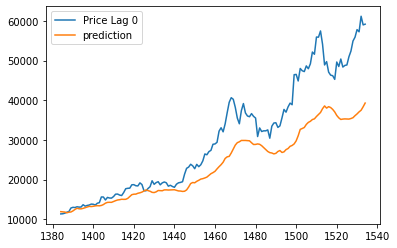

In [22]:
df_final[['Price Lag 0','prediction']].plot()

In [23]:
# model.save('third_model_0.h5')

In [24]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Projects/Cryptofuture/Time Series Prediction/second_model_0_0030.h5')

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 3, 256)            277504    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 3, 256)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 3, 128)            197120    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 3, 128)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)               

In [25]:
all_generator = TimeseriesGenerator(
    features, target, length=win_length, sampling_rate=1, 
    batch_size=batch_size
)

In [26]:
model.evaluate(all_generator,verbose=0)

[0.0004612526099663228, 0.013143472373485565]

In [27]:
predictions = model.predict(all_generator)

In [28]:
predictions

array([[-0.00411522],
       [-0.00270816],
       [-0.00252651],
       ...,
       [ 0.8223189 ],
       [ 0.8471741 ],
       [ 0.88078797]], dtype=float32)

In [29]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
rev_trans = scaler.inverse_transform(df_pred)
df_final = input_df[predictions.shape[0]*-1:]
df_final['App_Pred'] = rev_trans[:,0]
plot_data = pd.DataFrame()
plot_data['actual_prices'] = df_final['Price Lag 0']
plot_data['pred_prices'] = df_final['App_Pred']
plot_data['date'] = df['date'][df_final.index.start:df_final.index.stop]
plot_data = plot_data.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
plot_data

,actual_prices,pred_prices
date,,
2017-01-04,1135.41,536.893856
2017-01-05,989.35,621.872672
2017-01-06,886.16,632.843015
2017-01-07,888.87,709.056356
2017-01-08,900.86,693.474858
...,...,...
2021-03-11,57809.41,48754.029099
2021-03-12,57256.22,49767.084017
2021-03-13,61179.79,50448.854379


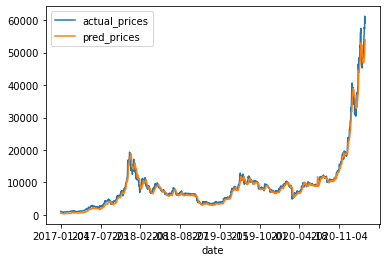

In [31]:
plot_data.plot()